# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.ensemble import IsolationForest 
from sklearn.decomposition import PCA

from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns', 100)

# Load Data
- inspection of data
    - .info()
    - .head()

In [2]:
path = 'Data/credit_card.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [3]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.254287,0.283266,0.919481,0.290123,-0.060268,0.119328,-0.068060,-0.065865,0.812108,-0.223647,0.769849,-1.298310,0.872823,0.708863,-0.148200,-0.013843,0.336903,-0.019875,-0.070028,0.030729,-0.057396,-0.158022,-0.030401,0.017295,0.085811,0.107121,0.006845,0.003067,64.520252
std,1.522637,1.314546,1.163288,1.427511,1.173778,1.299279,1.078250,1.255474,1.166215,1.099040,1.166212,1.523035,1.214494,1.241706,0.982085,0.882710,0.967641,0.794102,0.809517,0.595192,0.907699,0.631906,0.489834,0.591947,0.430758,0.556106,0.404949,0.267988,185.221202
min,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000
25%,-1.027537,-0.214263,0.424669,-0.589896,-0.645458,-0.633723,-0.535728,-0.192522,0.072521,-0.688422,-0.049507,-2.382661,0.011629,0.081149,-0.733039,-0.502403,-0.159532,-0.454213,-0.557802,-0.149775,-0.271001,-0.555175,-0.172704,-0.329963,-0.162928,-0.325964,-0.083980,-0.015625,5.380000
50%,-0.383856,0.292181,0.954225,0.235755,-0.156229,-0.160367,-0.052060,0.011440,0.815950,-0.340435,0.748672,-1.652614,0.949446,0.922855,-0.031137,0.062081,0.313472,0.017186,-0.084979,-0.020913,-0.128229,-0.145288,-0.044523,0.078389,0.118709,0.040788,-0.004320,0.016480,15.950000
75%,1.146465,0.913810,1.611713,1.138298,0.359786,0.489572,0.472143,0.264272,1.517105,0.170406,1.572927,0.065777,1.786078,1.499980,0.519083,0.537378,0.797031,0.445202,0.448598,0.160834,0.031776,0.238299,0.084179,0.407717,0.360469,0.467256,0.118735,0.078644,53.175000
max,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000


# EDA

- Checking for duplicates
- .info() states no null values but will double check
- graph 

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum().sum()

0

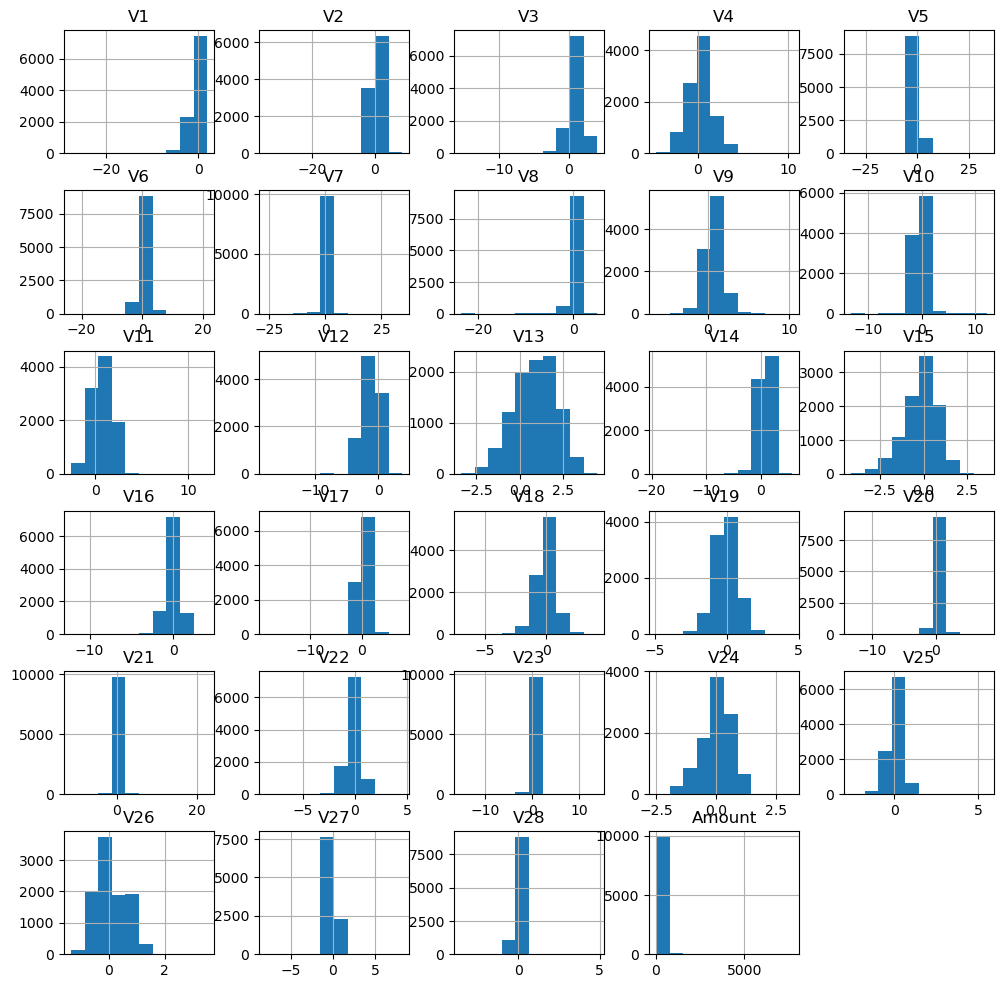

In [6]:
df.hist(figsize=(12,12));

All data look to be centered on 0.  Mostly normal distribution with some having tails and some with only one or two values

# Kmeans

Steps:
1. scaling
2. Stakeholder determined 3 clusters
3. Identify center and measue each data point from center
4. Identify fartthest point from closest center and label as anomaly

## Scaling 

Calling standardscaler on one line to simplfy coding

In [7]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.000000,4.618528e-18,4.263256e-18,-1.136868e-17,1.278977e-17,-1.563194e-17,2.842171e-18,7.105427e-19,2.273737e-17,2.273737e-17,7.958079e-17,-4.547474e-17,1.818989e-16,6.821210e-17,2.273737e-17,2.984279e-17,5.684342e-18,-3.126388e-17,1.705303e-17,8.526513e-18,-1.421085e-18,0.000000,-1.136868e-17,0.000000,1.918465e-17,2.273737e-17,2.842171e-18,-1.243450e-17,2.664535e-18
std,1.000050,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050,1.000050e+00,1.000050,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-18.006687,-2.654351e+01,-1.411218e+01,-3.466114e+00,-2.729091e+01,-1.817718e+01,-2.455962e+01,-1.877204e+01,-6.124311e+00,-1.180159e+01,-2.885705e+00,-1.081503e+01,-3.509730e+00,-1.604582e+01,-4.077583e+00,-1.383688e+01,-1.955809e+01,-8.690612e+00,-6.007225e+00,-2.235822e+01,-1.257202e+01,-13.244909,-3.085679e+01,-4.273688,-6.182844e+00,-2.599772e+00,-1.971446e+01,-1.310692e+01,-3.483590e-01
25%,-0.507861,-3.784986e-01,-4.253777e-01,-6.165018e-01,-4.985775e-01,-5.796205e-01,-4.337502e-01,-1.008889e-01,-6.342085e-01,-4.229124e-01,-7.026144e-01,-7.120035e-01,-7.091327e-01,-5.055510e-01,-5.955376e-01,-5.535057e-01,-5.130616e-01,-5.469820e-01,-6.025798e-01,-3.032860e-01,-2.353380e-01,-0.628531,-2.905271e-01,-0.586666,-5.774739e-01,-7.788192e-01,-2.242983e-01,-6.975227e-02,-3.193112e-01
50%,-0.085099,6.782439e-03,2.986867e-02,-3.808745e-02,-8.175830e-02,-2.152805e-01,1.484037e-02,6.157779e-02,3.294826e-03,-1.062683e-01,-1.815993e-02,-2.326422e-01,6.309369e-02,1.723455e-01,1.192048e-01,8.601562e-02,-2.421623e-02,4.667196e-02,-1.846964e-02,-8.676946e-02,-7.803955e-02,0.020153,-2.883205e-02,0.103214,7.637644e-02,-1.192856e-01,-2.757235e-02,5.005397e-02,-2.622415e-01
75%,0.919997,4.796908e-01,5.950950e-01,5.941939e-01,3.578826e-01,2.849753e-01,5.010253e-01,2.629713e-01,6.045470e-01,3.585611e-01,6.886560e-01,8.956822e-01,7.520007e-01,6.371526e-01,6.794896e-01,6.244954e-01,4.755387e-01,5.856934e-01,6.406927e-01,2.186046e-01,9.824494e-02,0.627215,2.339274e-01,0.659588,6.376485e-01,6.476346e-01,2.763214e-01,2.820298e-01,-6.125551e-02
max,1.454644,6.354564e+00,2.735690e+00,7.126675e+00,2.910371e+01,1.637432e+01,3.187847e+01,4.083320e+00,8.215687e+00,1.135921e+01,9.646300e+00,3.331113e+00,2.958243e+00,4.059031e+00,3.852449e+00,4.646881e+00,7.809575e+00,5.207948e+00,5.714050e+00,1.341121e+01,2.495048e+01,7.426276,2.839192e+01,5.377278,1.262788e+01,6.132634e+00,2.036787e+01,1.812750e+01,4.129275e+01


## Fitting KMeans model with stakeholder determined clusters

In [8]:
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init=10).fit(df_scaled)

Using cdist to find distance from each scaled data point and each center clutster.  This will be an array with one row for each data point and one column for each cluster center.

In [9]:
distance = cdist(df_scaled,kmeans.cluster_centers_, 'euclidean')
distance[:5]

array([[2.80468161, 4.39326354, 5.85721494],
       [2.42642963, 3.68608746, 5.07508117],
       [6.5426218 , 7.33737825, 8.65600243],
       [4.74252086, 5.67396639, 6.85457651],
       [3.24973107, 4.47873459, 6.10443916]])

In [10]:
distance.shape

(10000, 3)

Need to find the min distance for each data point to the closest cluster.  This will be an array, axis=1 to get a value for each row

In [11]:
min_distance = np.min(distance,axis=1)
min_distance[:5]

array([2.80468161, 2.42642963, 6.5426218 , 4.74252086, 3.24973107])

In [12]:
min_distance.shape

(10000,)

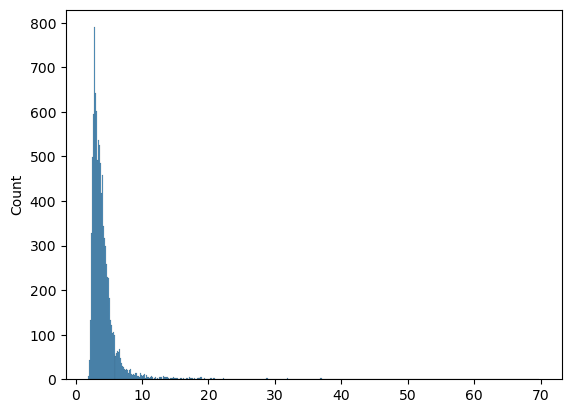

In [13]:
sns.histplot(min_distance);

## Determing threshold for anomalies

Relatively normal distribution with a right skew.  Stake holder determined 99.6% as the threshold.  Using np.percentile to get required threshold.  .4% will be outliers

In [14]:
threshold = np.percentile(min_distance,99.6)
threshold

20.909887868001256

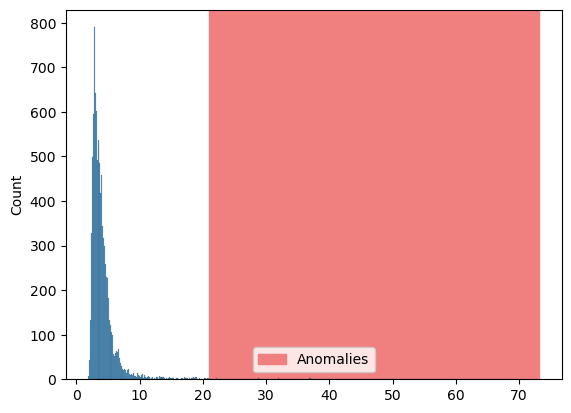

In [15]:
ax = sns.histplot(min_distance)

ax.axvspan(threshold,ax.get_xlim()[1],zorder=0, color='lightcoral',label='Anomalies')
ax.legend();

## Isolating anomalies

In [16]:
kmeans_filter = min_distance>threshold

anomalies = df[kmeans_filter]
anomalies

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
159,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,-0.362818,0.286155,0.487836,1.259957,0.660405,0.455263,-0.497644,0.792269,-0.978442,7.744222,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04
1376,-3.936794,-3.670519,-1.453820,2.299750,-9.749440,6.456410,10.784088,-2.160016,-0.238116,-1.004398,-0.318437,-1.981435,-0.876499,-1.095709,1.132103,1.643440,-0.853990,-0.165445,-0.810785,-2.203676,-0.979104,0.957186,2.441960,0.250607,0.300908,1.157867,1.624284,-1.638647,2452.03
1619,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,-2.636622,3.702177,-1.843056,2.427123,-1.652836,3.635042,4.087802,-1.654892,-0.888406,0.752276,-11.748689,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43
2156,-5.849226,-11.754975,-3.333303,3.673246,-4.459583,0.659098,4.527224,-0.985512,0.237794,-1.854230,-0.644609,0.123530,0.012160,0.853694,0.960689,0.615011,-0.056334,0.515516,-1.212439,7.314347,2.160870,-1.992179,-3.240351,0.609619,-0.985548,0.089693,-0.713355,0.653060,3669.00
2212,-5.149638,4.261740,-1.043112,-2.872586,-0.970562,2.037714,-4.472909,-14.892657,1.713550,0.090612,1.451729,1.805170,-1.685060,1.308130,0.321223,-0.769014,1.202188,0.191807,0.202332,-3.235393,14.718212,-4.432106,2.075999,-0.025098,0.042432,-0.045874,0.619351,0.287509,4.00
2439,-12.168192,-15.732974,-0.376474,3.792613,10.658654,-7.465603,-6.907038,1.573722,0.058164,-0.421881,1.034540,2.158435,0.384870,1.586790,-0.155446,-0.394043,0.510810,-0.412623,-1.097990,4.469095,1.660209,-0.910516,0.010468,-0.097246,-0.329918,0.225916,0.201802,-2.368534,120.00
2594,-2.574940,-2.669331,-3.080133,2.043551,-11.416881,7.885721,12.219249,-1.828209,-1.475925,-1.965803,0.789085,-0.160786,1.934111,-0.228977,1.698030,1.427955,-1.219459,1.558758,1.643275,0.828357,-0.115580,0.264090,2.219739,-0.771131,0.145438,-0.240517,1.180441,-0.623651,2909.97
2654,-7.546256,3.051033,-0.524684,1.005228,0.040486,2.751676,-6.267406,-19.176657,1.049976,0.521925,-0.298362,1.618002,-1.333216,0.696135,-0.444602,-0.456586,1.504989,-0.834556,-0.606355,-3.785808,9.639417,-3.053597,2.648404,0.429294,0.300704,-0.273082,1.300662,-0.641413,29.90
2756,-10.780565,-9.940571,1.703409,3.094958,7.929119,-4.032777,-8.945496,-5.099389,2.297646,-0.234243,-0.452866,2.134734,0.251165,-0.654290,-0.396737,0.170110,0.717256,-1.794904,-0.337865,-4.829446,-4.399837,1.633000,-0.711629,0.645921,-0.549247,0.704801,3.372603,-1.307732,85.00
2911,-4.344234,4.268511,-1.580163,0.272536,-1.419244,2.603639,-11.164794,-23.632502,-1.849347,-5.217814,-0.374267,3.606761,-1.114142,3.991662,0.752753,-0.518462,2.216999,-0.100099,0.709246,5.851381,-11.273890,3.661957,-0.200435,0.920605,0.619883,-0.381170,-0.132891,0.539894,1.00


## PCA

Unsing PCA to reduce features to two columns to plot graph

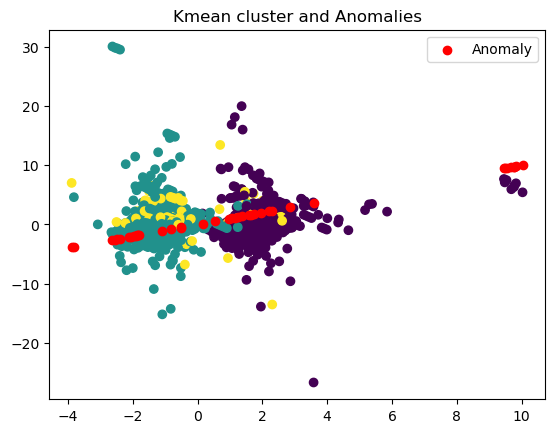

In [17]:
pca_to_plot = PCA(2).fit_transform(df_scaled)

kmeans_anomalies = pca_to_plot[kmeans_filter]

plt.scatter(pca_to_plot.iloc[:,0],pca_to_plot.iloc[:,1],c=kmeans.labels_)
plt.scatter(kmeans_anomalies.iloc[:,0],kmeans_anomalies.iloc[:,0],color='red', label="Anomaly")
plt.legend()
plt.title('Kmean cluster and Anomalies');

Anomalies seem to be in a straignt line with a postive slope

In [ ]:
# Isolation Forest

In [18]:
predictions = IsolationForest(contamination=.004,random_state=42).fit(df).predict(df)
predictions

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [19]:
iso_filter = predictions==-1
iso_filter

array([False, False, False, ..., False, False, False])

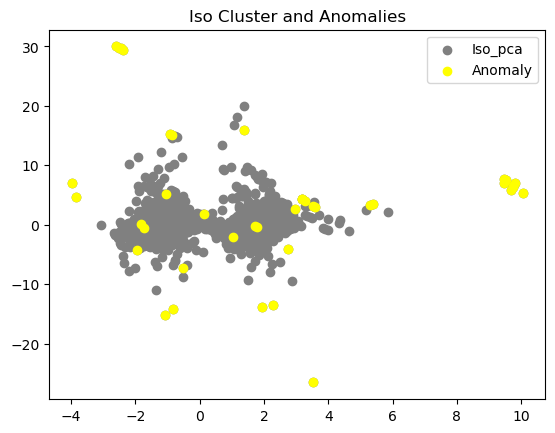

In [20]:
iso_to_plot = PCA(2).fit_transform(df_scaled)
iso_anomalies = iso_to_plot[iso_filter]

plt.scatter(iso_to_plot.iloc[:,0],iso_to_plot.iloc[:,1],c='Gray',label='Iso_pca')
plt.scatter(iso_anomalies.iloc[:,0],iso_anomalies.iloc[:,1],c="Yellow",label="Anomaly")
plt.legend()
plt.title('Iso Cluster and Anomalies');

In [41]:
common_anomalies = iso_filter & kmeans_filter
common_anomalies.sum()

27

In [42]:
len(kmeans_filter) == len(iso_filter)

True

In [50]:
agree_anomalies = df[common_anomalies]

In [68]:
percent_agree = 100*len(agree_anomalies)/len(df)
print(f'Of the {kmeans_filter.sum()} total anomalies, they agree on {common_anomalies.sum()}. This is only {percent_agree}% of the total data.')

Of the 40 total anomalies, they agree on 27. This is only 0.27% of the total data.


Text(0.5, 1.0, 'Anomalies')

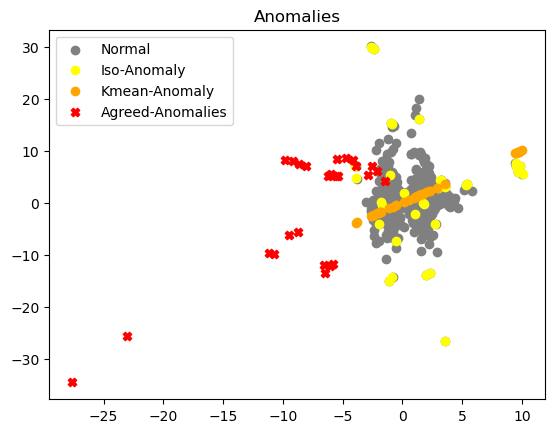

In [70]:
plt.scatter(pca_to_plot.iloc[:,0],pca_to_plot.iloc[:,1],c="Gray", label="Normal")
plt.scatter(iso_anomalies.iloc[:,0],iso_anomalies.iloc[:,1],c="Yellow",label="Iso-Anomaly")
plt.scatter(kmeans_anomalies.iloc[:,0],kmeans_anomalies.iloc[:,0],color='orange', label="Kmean-Anomaly")
plt.scatter(agree_anomalies.iloc[:,0],agree_anomalies.iloc[:,1],marker="X", color = "red",label="Agreed-Anomalies")
plt.legend()
plt.title('Anomalies');

27

10000